In [2]:
import pandas as pd
import os

bert_vit_results = [pd.read_csv(f'..\\out\\BERT_ViT\\{file_name}') for file_name in os.listdir('..\\out\\BERT_ViT')]
bert_mii_results = [pd.read_csv(f'..\\out\\BERT_MedImageInsight\\{file_name}') for file_name in os.listdir('..\\out\\BERT_MedImageInsight')]

In [3]:
EARLY_FUSION = 0
LATE_AVERAGE = 1
IMAGE_ONLY = 2
LATE_META = 3
TEXT_ONLY = 4
LATE_WEIGHT = 5

In [4]:
def adjust_tables(df_list, model):
    new_list = []
    for df, fusion in zip(df_list, ["Early-fusion", "Late_fusion_average", "Image_only", "Late_fusion_meta", "Text_only", "Late_fusion_weighted"]):
        new_df = df.round(3)
        new_df["type"] = [None, None, None, None, None, None, None, None, None, None, None, fusion]
        new_df["model"] = [None, None, None, None, None, None, None, None, None, None, None, model]
        new_df = new_df[["type", "model", "class", "class_name", "accuracy_mean", "accuracy_std", "precision_mean", "precision_std", "recall_mean", "recall_std", "f1_mean", "f1_std", "support_mean", "support_std"]]
        new_list.append(new_df)
    return new_list

In [5]:
bert_vit_results = adjust_tables(bert_vit_results, "BERT+ViT")
bert_mii_results = adjust_tables(bert_mii_results, "BERT+MedImageInsight")

display(bert_mii_results[LATE_META])

,type,model,class,class_name,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std,support_mean,support_std
0,None,None,C0000833,Abscess,0.867,0.015,0.841,0.042,0.896,0.045,0.867,0.036,79.200,0.40
1,None,None,C0003962,Ascites,NaN,NaN,0.853,0.055,0.894,0.032,0.872,0.029,41.400,0.49
2,None,None,C0006267,Bronchiectasis,NaN,NaN,0.817,0.078,0.811,0.077,0.810,0.048,16.800,0.40
3,None,None,C0006826,Malignant neoplastic disease,NaN,NaN,0.885,0.069,0.527,0.084,0.655,0.066,22.000,0.00
4,None,None,C0020295,Hydronephrosis,NaN,NaN,0.951,0.055,0.930,0.030,0.940,0.036,31.400,0.49
5,None,None,C0025062,Mediastinal Emphysema,NaN,NaN,0.913,0.044,0.841,0.068,0.873,0.035,33.800,0.40
6,None,None,C0031039,Pericardial effusion,NaN,NaN,0.928,0.047,0.974,0.017,0.950,0.029,69.000,0.00
7,None,None,C0032285,Pneumonia,NaN,NaN,0.790,0.081,0.779,0.052,0.783,0.057,29.000,0.00
8,None,None,C0032326,Pneumothorax,NaN,NaN,0.875,0.039,0.910,0.027,0.892,0.020,51.400,0.49
9,None,None,C0497156,Lymphadenopathy,NaN,NaN,0.822,0.036,0.828,0.027,0.825,0.030,50.000,0.00


In [16]:
bert = bert_vit_results[TEXT_ONLY]
vit = bert_vit_results[IMAGE_ONLY]
mii = bert_mii_results[IMAGE_ONLY]

bert = bert.loc[bert["class"] == "OVERRALL"].drop(["class","class_name"], axis=1)
vit = vit.loc[vit["class"] == "OVERRALL"].drop(["class", "class_name"], axis=1)
mii = mii.loc[mii["class"] == "OVERRALL"].drop(["class", "class_name"], axis=1)

bert["model"] = "BERT"
vit["model"] = "ViT"
mii["model"] = "MedImageInsight"

display(pd.concat([
    bert,
    vit,
    mii     
]))


,type,model,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std,support_mean,support_std
11,Text_only,BERT,0.868,0.017,0.867,0.042,0.840,0.059,0.850,0.038,40.491,0.22
11,Image_only,ViT,0.457,0.009,0.421,0.057,0.398,0.077,0.398,0.060,40.491,0.22
11,Image_only,MedImageInsight,0.688,0.020,0.662,0.079,0.641,0.073,0.643,0.063,40.491,0.22


In [17]:
comparative_df_list = []

for bert_vit, bert_mii in zip(bert_vit_results, bert_mii_results):
    concatenated_df = pd.concat(
        [
            bert_vit[(bert_vit["class"] == "OVERRALL")],
            bert_mii[(bert_mii["class"] == "OVERRALL")]
        ], ignore_index=True
    )
    concatenated_df["Models"] = ["BERT+ViT", "BERT+MedImageInsight"]
    comparative_df_list.append(concatenated_df)
    
comparative_df_list[EARLY_FUSION]

,type,model,class,class_name,accuracy_mean,accuracy_std,precision_mean,precision_std,recall_mean,recall_std,f1_mean,f1_std,support_mean,support_std,Models
0,Early-fusion,BERT+ViT,OVERRALL,NaN,0.846,0.016,0.84,0.043,0.815,0.057,0.823,0.034,40.491,0.22,BERT+ViT
1,Early-fusion,BERT+MedImageInsight,OVERRALL,NaN,0.858,0.016,0.85,0.048,0.830,0.054,0.836,0.036,40.491,0.22,BERT+MedImageInsight


In [25]:
def merge_mean_std(df):
    new_df = pd.DataFrame()
    if "class" in df.columns:
        new_df["class"] = df["class"]
    if "class_name" in df.columns:
        new_df["class_name"] = df["class_name"]
    new_df["type"] = df["type"]
    new_df["model"] = df["model"]
    if "Models" in df.columns:
        new_df["Models"] = df["Models"]
    metrics = ["accuracy", "precision", "recall", "f1", "support"]
    for metric in metrics:
    
        new_df[f"{metric}"] = df[f"{metric}_mean"].apply(str) + " ± " + df[f"{metric}_std"].apply(str)
    return new_df

print("MII")
display(merge_mean_std(
    pd.concat(
        [
            bert_mii_results[LATE_AVERAGE][(bert_mii_results[LATE_AVERAGE]["class"]== "OVERRALL")], 
            bert_mii_results[LATE_WEIGHT][(bert_mii_results[LATE_WEIGHT]["class"] == "OVERRALL")], 
            bert_mii_results[LATE_META][(bert_mii_results[LATE_META]["class"] == "OVERRALL")]
        ])))

print("ViT")
display(merge_mean_std(
    pd.concat(
        [
            bert_vit_results[LATE_AVERAGE][(bert_vit_results[LATE_AVERAGE]["class"]== "OVERRALL")], 
            bert_vit_results[LATE_WEIGHT][(bert_vit_results[LATE_WEIGHT]["class"] == "OVERRALL")], 
            bert_vit_results[LATE_META][(bert_vit_results[LATE_META]["class"] == "OVERRALL")]
        ])))

MII


,class,class_name,type,model,accuracy,precision,recall,f1,support
11,OVERRALL,NaN,Late_fusion_average,BERT+MedImageInsight,0.858 ± 0.013,0.847 ± 0.05,0.821 ± 0.071,0.829 ± 0.049,40.491 ± 0.22
11,OVERRALL,NaN,Late_fusion_weighted,BERT+MedImageInsight,0.869 ± 0.006,0.86 ± 0.031,0.836 ± 0.029,0.846 ± 0.017,67.485 ± 0.227
11,OVERRALL,NaN,Late_fusion_meta,BERT+MedImageInsight,0.867 ± 0.015,0.868 ± 0.053,0.836 ± 0.049,0.845 ± 0.04,40.491 ± 0.22


ViT


,class,class_name,type,model,accuracy,precision,recall,f1,support
11,OVERRALL,NaN,Late_fusion_average,BERT+ViT,0.858 ± 0.013,0.847 ± 0.05,0.821 ± 0.071,0.829 ± 0.049,40.491 ± 0.22
11,OVERRALL,NaN,Late_fusion_weighted,BERT+ViT,0.849 ± 0.009,0.844 ± 0.027,0.813 ± 0.044,0.825 ± 0.022,67.485 ± 0.227
11,OVERRALL,NaN,Late_fusion_meta,BERT+ViT,0.834 ± 0.021,0.843 ± 0.054,0.798 ± 0.061,0.814 ± 0.043,40.491 ± 0.22


In [ ]:
meta = bert_mii_results[LATE_META]
text = bert_vit_results[TEXT_ONLY]

difference = meta["f1_mean"] - text["f1_mean"]
difference["Class"] = meta["class"]
display(difference)

In [27]:
meta_vit = bert_vit_results[LATE_META]
meta_mii = bert_mii_results[LATE_META]

meta_vit = meta_vit.loc[meta_vit["class"] == "OVERRALL"].drop(["class", "class_name"], axis=1)
meta_mii = meta_mii.loc[meta_mii["class"] == "OVERRALL"].drop(["class", "class_name"], axis=1)


mean_vit = bert_vit_results[LATE_AVERAGE]
mean_mii = bert_mii_results[LATE_AVERAGE]

mean_vit = mean_vit.loc[mean_vit["class"] == "OVERRALL"].drop(["class", "class_name"], axis=1)
mean_mii = mean_mii.loc[mean_mii["class"] == "OVERRALL"].drop(["class", "class_name"], axis=1)

weight_vit = bert_vit_results[LATE_WEIGHT]
weight_mii = bert_mii_results[LATE_WEIGHT]

weight_vit = weight_vit.loc[weight_vit["class"] == "OVERRALL"].drop(["class", "class_name"], axis=1)
weight_mii = weight_mii.loc[weight_mii["class"] == "OVERRALL"].drop(["class", "class_name"], axis=1)


late_conc = merge_mean_std(pd.concat([
    mean_vit,
    mean_mii,
    weight_vit,
    weight_mii,
    meta_vit,
    meta_mii,
]))

late_conc.to_csv("..\\assets\\all_late.csv")

display(late_conc)

,type,model,accuracy,precision,recall,f1,support
11,Late_fusion_average,BERT+ViT,0.858 ± 0.013,0.847 ± 0.05,0.821 ± 0.071,0.829 ± 0.049,40.491 ± 0.22
11,Late_fusion_average,BERT+MedImageInsight,0.858 ± 0.013,0.847 ± 0.05,0.821 ± 0.071,0.829 ± 0.049,40.491 ± 0.22
11,Late_fusion_weighted,BERT+ViT,0.849 ± 0.009,0.844 ± 0.027,0.813 ± 0.044,0.825 ± 0.022,67.485 ± 0.227
11,Late_fusion_weighted,BERT+MedImageInsight,0.869 ± 0.006,0.86 ± 0.031,0.836 ± 0.029,0.846 ± 0.017,67.485 ± 0.227
11,Late_fusion_meta,BERT+ViT,0.834 ± 0.021,0.843 ± 0.054,0.798 ± 0.061,0.814 ± 0.043,40.491 ± 0.22
11,Late_fusion_meta,BERT+MedImageInsight,0.867 ± 0.015,0.868 ± 0.053,0.836 ± 0.049,0.845 ± 0.04,40.491 ± 0.22


Grafici
- f1 di tutto sull'overall
- f1 testo-late_meta_mii su ogni classe

In [34]:
import matplotlib.pyplot as plt

method = TEXT_ONLY

overall_f1_text = {"BERT": bert_vit_results[method].loc[bert_vit_results[method]["class"] == "OVERRALL"]["f1_mean"].iloc[0]}


method = IMAGE_ONLY
overall_f1_image = {

        "ViT": bert_vit_results[method].loc[bert_vit_results[method]["class"] == "OVERRALL"]["f1_mean"].iloc[0],
        "MedImageInsight": bert_mii_results[method].loc[bert_mii_results[method]["class"] == "OVERRALL"]["f1_mean"].iloc[0],
    
}

method = EARLY_FUSION
overall_f1_feature = {

        "BERT+ViT": bert_vit_results[method].loc[bert_vit_results[method]["class"] == "OVERRALL"]["f1_mean"].iloc[0],
        "BERT+MedImageInsight": bert_mii_results[method].loc[bert_mii_results[method]["class"] == "OVERRALL"]["f1_mean"].iloc[0],
    
}

method = LATE_AVERAGE
overall_f1_mean = {
        "BERT+ViT": bert_vit_results[method].loc[bert_vit_results[method]["class"] == "OVERRALL"]["f1_mean"].iloc[0],
        "BERT+MedImageInsight": bert_mii_results[method].loc[bert_mii_results[method]["class"] == "OVERRALL"]["f1_mean"].iloc[0],
    
}


method = LATE_WEIGHT
overall_f1_weight = {
        "BERT+ViT": bert_vit_results[method].loc[bert_vit_results[method]["class"] == "OVERRALL"]["f1_mean"].iloc[0],
        "BERT+MedImageInsight": bert_mii_results[method].loc[bert_mii_results[method]["class"] == "OVERRALL"]["f1_mean"].iloc[0],
    
}


method = LATE_META
overall_f1_meta = {
        "BERT+ViT": bert_vit_results[method].loc[bert_vit_results[method]["class"] == "OVERRALL"]["f1_mean"].iloc[0],
        "BERT+MedImageInsight": 0.85,
}


data = {
    "Text": overall_f1_text, 
    "Image": overall_f1_image, 
    "Feature": overall_f1_feature, 
    "Average": overall_f1_mean, 
    "Weighted": overall_f1_weight, 
    "Meta": overall_f1_meta
}

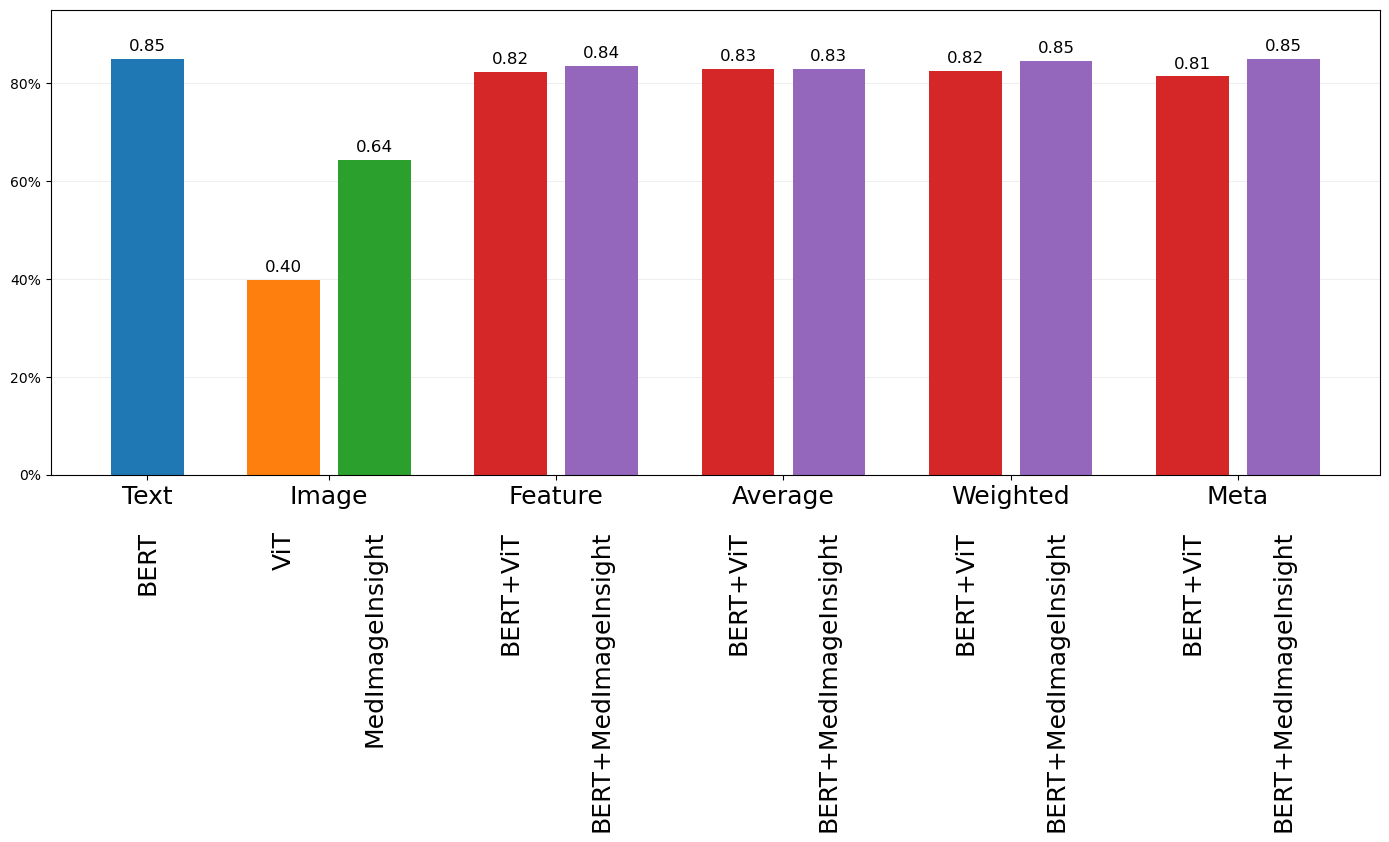

In [52]:
import numpy as np
# Prepare data for plotting
categories = list(data.keys())
all_labels = []
all_values = []
all_positions = []

x_pos = 0
x_ticks = []
x_labels = []

for category in categories:
    methods = data[category]
    for method, value in methods.items():
        all_labels.append(method)
        all_values.append(value)
        all_positions.append(x_pos)
        x_pos += 1
    
    # Add tick position at the center of the category
    if len(methods) == 1:
        x_ticks.append(x_pos - 1)
    else:
        x_ticks.append(x_pos - 1.5)
    x_labels.append(category)
    
    # Add space between categories
    x_pos += 0.5

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Define colors for each method
color_map = {
    "BERT": '#1f77b4',
    "ViT": '#ff7f0e',
    "MedImageInsight": '#2ca02c',
    "BERT+ViT": '#d62728',
    "BERT+MedImageInsight": '#9467bd',
}

# Assign colors to each bar based on its label
bar_colors = [color_map[label] for label in all_labels]

bars = ax.bar(all_positions, all_values, width=0.8, color=bar_colors, edgecolor='none')

# Add value labels on top of each bar
for pos, value in zip(all_positions, all_values):
    ax.text(pos, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=12)

# Customize the plot
ax.set_ylim(0, 0.95)
ax.set_ylabel('', fontsize=12)
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels, fontsize=18)

# Format y-axis as percentages
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y*100)}%'))

# Add grid
ax.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# Add method labels on x-axis with more space
for i, (pos, label) in enumerate(zip(all_positions, all_labels)):
    ax.text(pos, -0.12, label, ha='center', va='top', fontsize=18, 
            rotation=90, transform=ax.get_xaxis_transform())

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

plt.show()

In [ ]:
text = bert_vit_results[TEXT_ONLY][["class_name", "f1_mean"]]
late_meta_mii = bert_mii_results[LATE_META][["class_name", "f1_mean"]]

# Create list to store rows
rows = []

for (text_class, text_f1), (meta_class, meta_f1) in zip(
    text[["class_name", "f1_mean"]].values, 
    late_meta_mii[["class_name", "f1_mean"]].values
):
    if meta_f1 > text_f1:
        rows.append({
            'class_name': meta_class,
            'text_f1': text_f1,
            'meta_f1': meta_f1,
        })

# Create DataFrame
new_df = pd.DataFrame(rows)

# Optional: sort by improvement
new_df = new_df.sort_values('improvement', ascending=False).reset_index(drop=True)

display(new_df)


,class_name,text_f1,meta_f1,improvement
0,Mediastinal Emphysema,0.839,0.873,0.034
1,Bronchiectasis,0.789,0.810,0.021
2,Pneumothorax,0.872,0.892,0.020
3,COVID19 (disease),0.827,0.834,0.007
4,Abscess,0.864,0.867,0.003


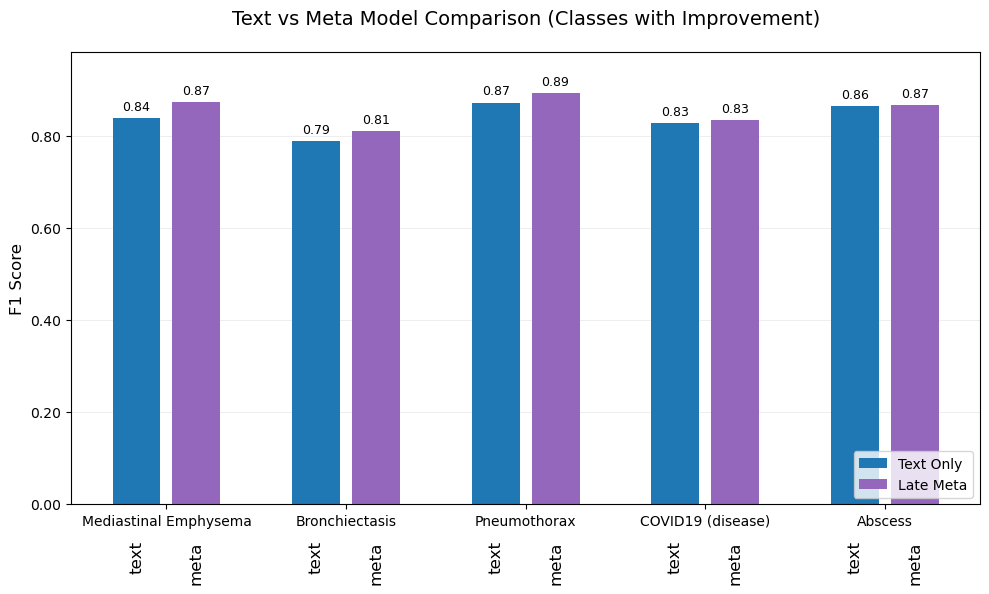

In [ ]:
# Prepare data for plotting
classes = new_df['class_name'].values
text_scores = new_df['text_f1'].values
meta_scores = new_df['meta_f1'].values

# Create positions for bars
n_classes = len(classes)
x_positions = []
bar_labels = []
bar_values = []
bar_colors = []

# Define colors
text_color = '#1f77b4'  # Blue for text
meta_color = '#9467bd'  # Purple for meta

# Build data for bars
for i in range(n_classes):
    # Text bar
    x_positions.append(i * 3)
    bar_labels.append('text')
    bar_values.append(text_scores[i])
    bar_colors.append(text_color)
    
    # Meta bar
    x_positions.append(i * 3 + 1)
    bar_labels.append('meta')
    bar_values.append(meta_scores[i])
    bar_colors.append(meta_color)

# Create the plot
fig, ax = plt.subplots(figsize=(max(10, n_classes * 2), 6))

bars = ax.bar(x_positions, bar_values, width=0.8, color=bar_colors, edgecolor='none')

# Add value labels on top of each bar
for pos, value in zip(x_positions, bar_values):
    ax.text(pos, value + 0.01, f'{value:.2f}', ha='center', va='bottom', fontsize=9)

# Customize the plot
ax.set_ylim(0, max(bar_values) * 1.1)
ax.set_ylabel('F1 Score', fontsize=12)

# Set x-ticks for class names (centered between text and meta bars)
class_positions = [i * 3 + 0.5 for i in range(n_classes)]
ax.set_xticks(class_positions)
ax.set_xticklabels(classes, fontsize=10)

# Format y-axis
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{y:.2f}'))

# Add grid
ax.grid(axis='y', alpha=0.3, linestyle='-', linewidth=0.5)
ax.set_axisbelow(True)

# Add method labels (text/meta) below x-axis
for i, (pos, label) in enumerate(zip(x_positions, bar_labels)):
    ax.text(pos, -0.08, label, ha='center', va='top', fontsize=12, 
            rotation=90, transform=ax.get_xaxis_transform())

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=text_color, label='Text Only'),
    Patch(facecolor=meta_color, label='Late Meta')
]
ax.legend(handles=legend_elements, loc='lower right')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

plt.show()